In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 1: Import data

In [2]:
store = pd.read_csv('store_v3.csv', index_col = 'Store').drop('Skip', 1)
store.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store.shape

(1115, 9)

In [4]:
train = pd.read_csv('train_v3.csv', parse_dates = True, index_col = 'Date', low_memory = False).drop('Skip', 1)
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-01-30,1,5,5577,616,1,1,0,0
2015-01-30,2,5,5919,624,1,1,0,0
2015-01-30,3,5,6911,678,1,1,0,0
2015-01-30,4,5,13307,1632,1,1,0,0
2015-01-30,5,5,5640,617,1,1,0,0


In [5]:
train.shape

(66900, 8)

In [6]:
test = pd.read_csv('test_v3.csv', parse_dates = True, index_col = 'Date', low_memory = False).drop('Skip', 1)
test.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-07-31,1,5,555,1,1,0,1
2015-07-31,2,5,625,1,1,0,1
2015-07-31,3,5,821,1,1,0,1
2015-07-31,4,5,1498,1,1,0,1
2015-07-31,5,5,559,1,1,0,1


In [7]:
test.shape

(33450, 7)

## Step 2: Transform the data

### Add new features

#### Train

In [8]:
# Extract Date
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day

#### Test

In [9]:
# Extract Date
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day

### Missing Values

In [10]:
store.isnull().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
store.CompetitionDistance.fillna(store.CompetitionDistance.mean(), inplace=True)

In [12]:
store.loc[:, ['Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = store.loc[:, ['Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].fillna(0.)
store.PromoInterval.fillna('None', inplace=True)
print('{} NaN values'.format(store.isnull().sum().sum()))

0 NaN values


### Set categorical data to 'category' datatype

In [13]:
store.dtypes

StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
store.loc[:, 'StoreType'] = store.loc[:, 'StoreType'].astype('category')
store.loc[:, 'Assortment'] = store.loc[:, 'Assortment'].astype('category')
store.loc[:, 'PromoInterval'] = store.loc[:, 'PromoInterval'].astype('category')

In [15]:
train.dtypes

Store             int64
DayOfWeek         int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
Year              int64
Month             int64
Day               int64
dtype: object

In [16]:
train.loc[:, 'DayOfWeek'] = train.loc[:, 'DayOfWeek'].astype('category')
train.loc[:, 'StateHoliday'] = train.loc[:, 'StateHoliday'].astype('category')
train.loc[:, 'Year'] = train.loc[:, 'Year'].astype('category')
train.loc[:, 'Month'] = train.loc[:, 'Month'].astype('category')

In [17]:
test.dtypes

Store            int64
DayOfWeek        int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int64
SchoolHoliday    int64
Year             int64
Month            int64
Day              int64
dtype: object

In [18]:
test.loc[:, 'DayOfWeek'] = test.loc[:, 'DayOfWeek'].astype('category')
test.loc[:, 'StateHoliday'] = test.loc[:, 'StateHoliday'].astype('category')
test.loc[:, 'Year'] = test.loc[:, 'Year'].astype('category')
test.loc[:, 'Month'] = test.loc[:, 'Month'].astype('category')

### Merge our tables with inner join by 'Store' column.

In [19]:
train_store = train.join(store, 'Store', 'inner')
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,
2015-01-30,1,5,5577,616,1,1,0,0,2015,1,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-01-29,1,4,5171,573,1,1,0,0,2015,1,29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-01-28,1,3,4310,537,1,1,0,0,2015,1,28,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-01-27,1,2,4806,532,1,1,0,0,2015,1,27,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-01-26,1,1,4781,566,1,1,0,0,2015,1,26,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None


In [20]:
train_store.shape

(66900, 20)

In [21]:
test_store = test.join(store, 'Store', 'inner')
test_store.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,555,1,1,0,1,2015,7,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-07-30,1,4,546,1,1,0,1,2015,7,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-07-29,1,3,523,1,1,0,1,2015,7,29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-07-28,1,2,560,1,1,0,1,2015,7,28,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2015-07-27,1,1,612,1,1,0,1,2015,7,27,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None


In [22]:
test_store.shape

(33450, 19)

### Search for outliers

Text(0,0.5,'Sales')

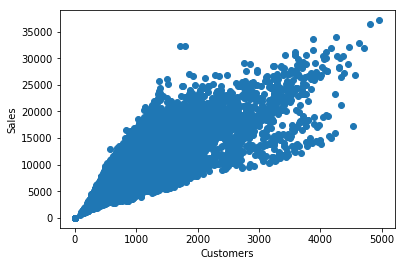

In [23]:
plt.scatter(train_store.Customers, train_store.Sales)
plt.xlabel('Customers')
plt.ylabel('Sales')

Text(0,0.5,'Sales')

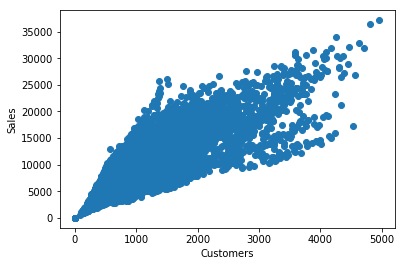

In [24]:
train_store.drop(train_store[(train_store.Customers<2000) & (train_store.Sales>30000)].index, inplace=True)
plt.scatter(train_store.Customers, train_store.Sales)
plt.xlabel('Customers')
plt.ylabel('Sales')

### Create new features from existing ones

In [25]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [26]:
train_store.PromoInterval.value_counts()

None                33864
Jan,Apr,Jul,Oct     17114
Feb,May,Aug,Nov      7559
Mar,Jun,Sept,Dec     6313
Name: PromoInterval, dtype: int64

In [27]:
train_store['Weekend'] = 0
train_store.loc[train_store.DayOfWeek.isin([6,7]), 'Weekend'] = 1
test_store['Weekend'] = 0
test_store.loc[test_store.DayOfWeek.isin([6,7]), 'Weekend'] = 1

train_store['isStateHoliday'] = 0
train_store.loc[train_store.StateHoliday != '0', 'isStateHoliday'] = 1
test_store['isStateHoliday'] = 0
test_store.loc[test_store.StateHoliday != '0', 'isStateHoliday'] = 1

train_store['CompetitionOpen'] = 0
train_store.loc[train_store.CompetitionOpenSinceYear != 0., 'CompetitionOpen'] = 1
test_store['CompetitionOpen'] = 0
test_store.loc[test_store.CompetitionOpenSinceYear != 0., 'CompetitionOpen'] = 1

In [28]:
train_store.loc[train_store.CompetitionOpenSinceYear != 0., :].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend,isStateHoliday,CompetitionOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-30,1,5,5577,616,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-29,1,4,5171,573,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-28,1,3,4310,537,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-27,1,2,4806,532,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-26,1,1,4781,566,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1


### Correlations

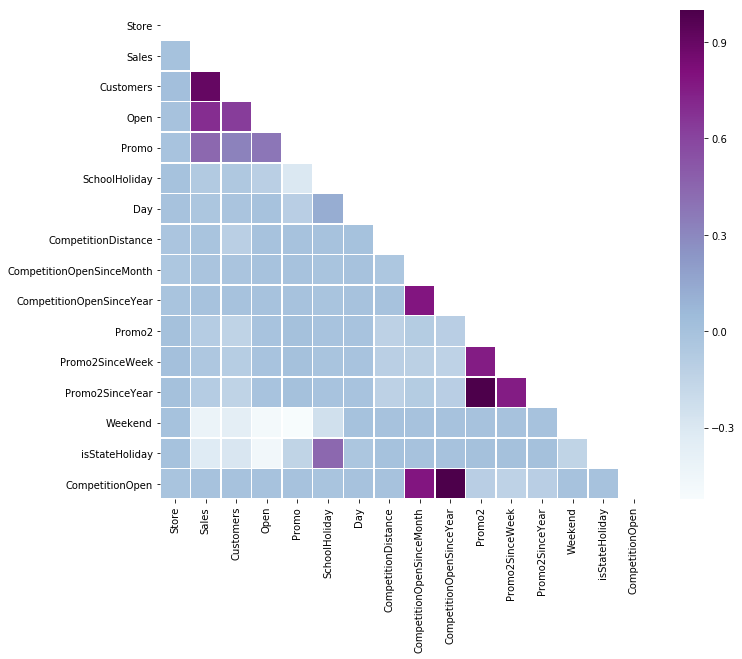

In [29]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_store.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [30]:
#Find most important features relative to target
print("Find most important features relative to target")
corr_all.sort_values(["Sales"], ascending = False, inplace = True)
print(corr_all.Sales)

Find most important features relative to target
Sales                        1.000000
Customers                    0.907726
Open                         0.696124
Promo                        0.442343
Store                        0.002732
CompetitionOpenSinceYear    -0.004638
CompetitionOpen             -0.004699
CompetitionDistance         -0.016649
CompetitionOpenSinceMonth   -0.020022
Day                         -0.034724
Promo2SinceWeek             -0.046072
SchoolHoliday               -0.065813
Promo2                      -0.085008
Promo2SinceYear             -0.085028
isStateHoliday              -0.323898
Weekend                     -0.416855
Name: Sales, dtype: float64


In [31]:
corr_all[(corr_all.Sales > 0.1) | (corr_all.Sales < -0.1)].index

Index(['Sales', 'Customers', 'Open', 'Promo', 'isStateHoliday', 'Weekend'], dtype='object')

### Concatenate train and test data for easier data transformation

In [34]:
test_store['Sales'] = -1
train_test_store = pd.concat([train_store, test_store], sort=False)
train_test_store.shape

(98300, 23)

In [35]:
train_test_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend,isStateHoliday,CompetitionOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-30,1,5,5577,616,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-29,1,4,5171,573,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-28,1,3,4310,537,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-27,1,2,4806,532,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1
2015-01-26,1,1,4781,566,1,1,0,0,2015,1,...,1270.0,9.0,2008.0,0,0.0,0.0,None,0,0,1


### One Hot label encoding

In [36]:
#train_test_store_dummies = pd.get_dummies(train_test_store)
#train_test_store_dummies_drop_first = pd.get_dummies(train_test_store, drop_first=True)
#print("train_test_store_dummies' shape", train_test_store_dummies.shape)
#print("train_test_store_dummies_drop_first' shape", train_test_store_dummies_drop_first.shape)

### Log transformation for normal distribution

/home/aftergod/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


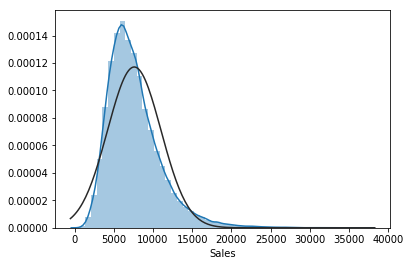

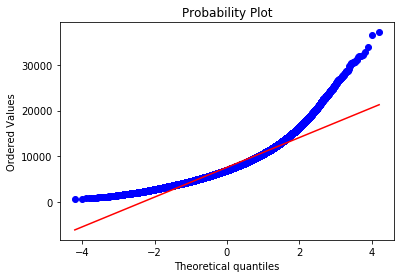

In [37]:
#histogram and normal probability plot
sns.distplot(train_test_store[train_test_store.Sales > 0].Sales, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_test_store[train_test_store.Sales > 0].Sales, plot=plt)

/home/aftergod/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


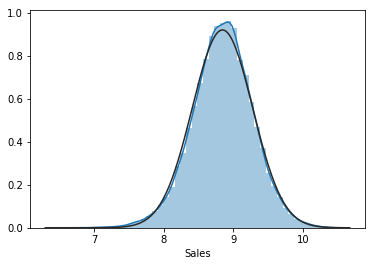

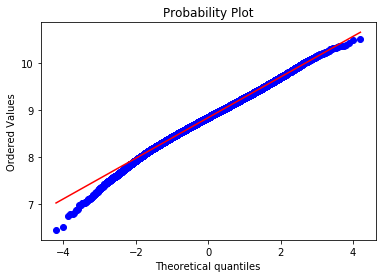

In [38]:
train_test_store.loc[train_test_store.Sales > 0, 'Sales'] = np.log1p(train_test_store[train_test_store.Sales > 0].Sales)
sns.distplot(train_test_store[train_test_store.Sales > 0].Sales, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_test_store[train_test_store.Sales > 0].Sales, plot=plt)

/home/aftergod/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


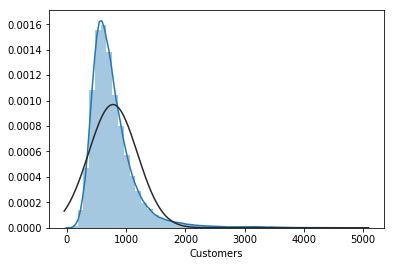

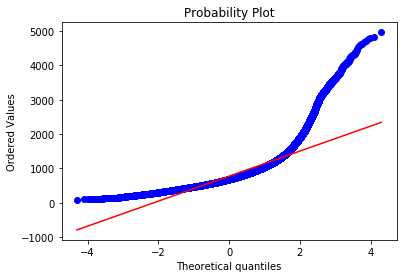

In [39]:
sns.distplot(train_test_store[train_test_store.Customers > 0].Customers, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_test_store[train_test_store.Customers > 0].Customers, plot=plt)

/home/aftergod/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


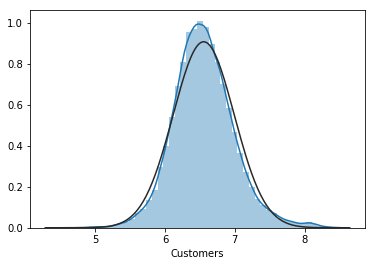

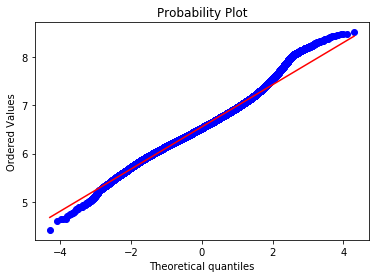

In [40]:
train_test_store.Customers = np.log1p(train_test_store.Customers)
sns.distplot(train_test_store[train_test_store.Customers > 0].Customers, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train_test_store[train_test_store.Customers > 0].Customers, plot=plt)

### Drop columns with bad correlation

In [41]:
train_test_store = train_test_store[corr_all[(corr_all.Sales > 0.1) | (corr_all.Sales < -0.1)].index]
train_test_store.shape

(98300, 6)

### Add transformed versions of Customers column

In [42]:
train_test_store["Customers-2"] = train_test_store["Customers"] ** 2
train_test_store["Customers-3"] = train_test_store["Customers"] ** 3
train_test_store["Customers-Sq"] = np.sqrt(train_test_store["Customers"])

In [43]:
train_test_store.tail()

,Sales,Customers,Open,Promo,isStateHoliday,Weekend,Customers-2,Customers-3,Customers-Sq
Date,,,,,,,,,
2015-07-06,-1.0,6.118097,1,0,1,0,37.431113,229.007190,2.473479
2015-07-05,-1.0,0.000000,0,0,1,1,0.000000,0.000000,0.000000
2015-07-04,-1.0,6.146329,1,0,1,1,37.777363,232.192114,2.479179
2015-07-03,-1.0,6.171701,1,1,1,0,38.089888,235.079386,2.484291
2015-07-02,-1.0,6.115892,1,1,1,0,37.404136,228.759664,2.473033


### Get training ready data

In [44]:
X = train_test_store[train_test_store.Sales > 0.].drop(['Sales', 'Open'], axis=1)
y = train_test_store[train_test_store.Sales > 0.].Sales

## Step 3: Instantiate models

In [45]:
from sklearn.model_selection import KFold, cross_val_score
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [47]:
# import our models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost
import lightgbm

In [48]:
linreg = LinearRegression()
#score = rmsle_cv(linreg)
#print("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [49]:
knn = KNeighborsRegressor(125)
#score = rmsle_cv(knn)
#print("125 Nearest Neighbors score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [50]:
ada = AdaBoostRegressor(n_estimators=100,random_state=42)
#score = rmsle_cv(ada)
#print("Ada Boost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [51]:
GBoost = GradientBoostingRegressor(n_estimators=100,random_state=42)
#score = rmsle_cv(GBoost)
#print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [52]:
forest = RandomForestRegressor(n_estimators=100,random_state=42)
#score = rmsle_cv(forest)
#print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [53]:
xgb = xgboost.XGBRegressor(n_estimators=100, random_state =42)
#score = rmsle_cv(xgb)
#print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [54]:
lgb = lightgbm.LGBMRegressor(objective='regression', n_estimators=100, random_state =42)
#score = rmsle_cv(lgb)
#print("LightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (knn, ada, GBoost, forest),
                                                 meta_model = linreg)

#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

## Step 4: Fit

In [57]:
stacked_averaged_models.fit(X.values, y.values)
xgb.fit(X.values, y.values)
lgb.fit(X.values, y.values)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=42,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

## Step 5: Predict

In [59]:
result = pd.read_csv('test_v3.csv', parse_dates = True, usecols=['Date'], low_memory = False)
result['id'] = result.index + 1
result['Sales'] = 0.
result.set_index('Date', inplace=True)
result.head()

,id,Sales
Date,,
2015-07-31,1,0.0
2015-07-31,2,0.0
2015-07-31,3,0.0
2015-07-31,4,0.0
2015-07-31,5,0.0


In [60]:
target = train_test_store[(train_test_store.Sales == -1) & (train_test_store.Customers != 0)].drop(['Sales', 'Open'], axis = 1).values
result.loc[test.Customers != 0,'Sales'] = ( 0.70 * np.expm1(stacked_averaged_models.predict(target))
                                              + 0.15 * np.expm1(xgb.predict(target))
                                              + 0.15 * np.expm1(lgb.predict(target)))
result.Sales = result.Sales.astype('int64')
result.head()

,id,Sales
Date,,
2015-07-31,1,4684
2015-07-31,2,4631
2015-07-31,3,4738
2015-07-31,4,4774
2015-07-31,5,4911


In [59]:
test.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
Date,,,,,,,,,,
2015-07-31,1,5,555,1,1,0,1,2015,7,31
2015-07-31,2,5,625,1,1,0,1,2015,7,31
2015-07-31,3,5,821,1,1,0,1,2015,7,31
2015-07-31,4,5,1498,1,1,0,1,2015,7,31
2015-07-31,5,5,559,1,1,0,1,2015,7,31


In [61]:
result.to_csv('submission.csv',index=False)